### LIBRERIAS

In [1]:
# Implementación de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import tensorflow as tf
from tabulate import tabulate
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import BatchNormalization

# Cargar base de datos
df = pd.read_csv("Datosmuestra.csv")  

In [2]:
# Contar valores nulos 
missing_values = df.isnull().sum()

# Mostrar columnas con valores nulos
missing_values[missing_values > 0]


Series([], dtype: int64)

In [3]:
# Mostrar filas duplicadas
num_duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")

# Eliminar filas duplicadas
df = df.drop_duplicates()

# Mostrar filas duplicadas para confirmar que fueron eliminadas
num_duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 5
Número de filas duplicadas: 0


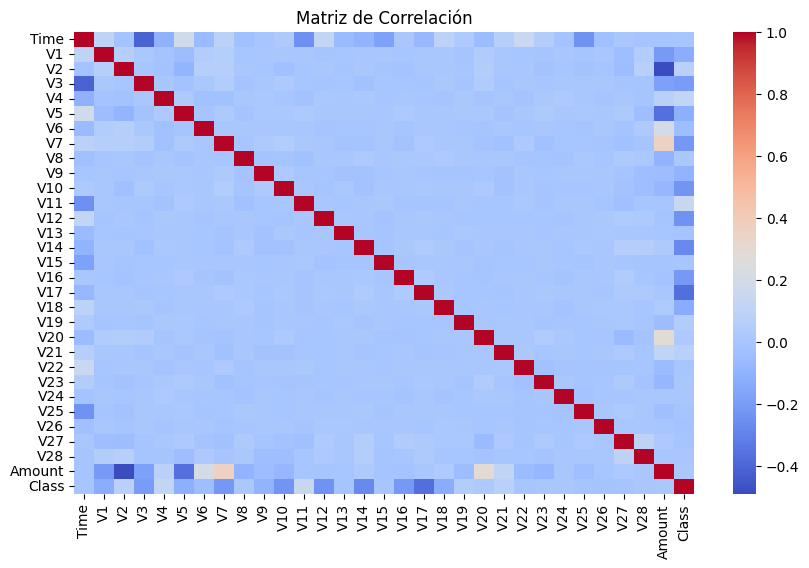

In [4]:
# Análisis de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


Distribución original: Counter({0: 19961, 1: 34})
Distribución después del balanceo: Counter({0: 15969, 1: 15969})


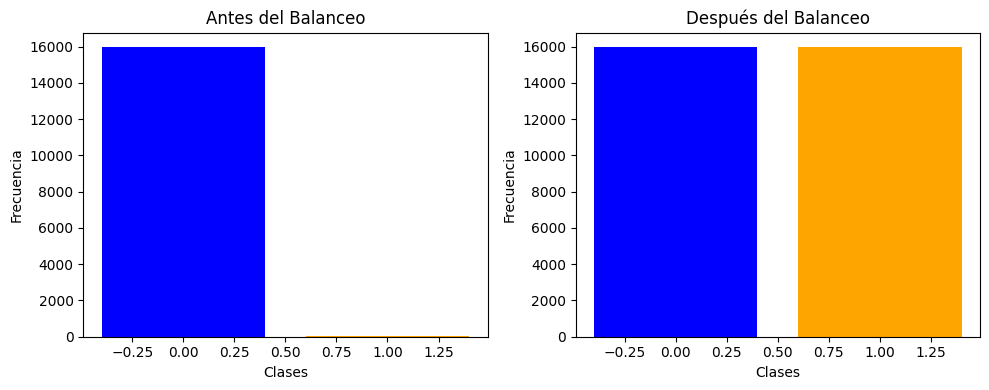

In [ ]:
# Verificar el desbalance de clases
print("Distribución original:", Counter(df['Class']))

# Separar características (X) y etiquetas (y)
X = df.drop(columns=['Class'])  
y = df['Class']

# Dividir en datos de entrenamiento y prueba
x_trains, x_test, y_trains, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Aplicar SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = smote.fit_resample(x_trains, y_trains)

print("Distribución de entrenamiento después del balanceo:", Counter(y_train))

# Visualizar distribución antes y después del balanceo
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Antes del balanceo
axs[0].bar(Counter(y_trains).keys(), Counter(y_trains).values(), color=['blue', 'orange'])
axs[0].set_title('Antes del Balanceo')
axs[0].set_xlabel('Clases')
axs[0].set_ylabel('Frecuencia')

# Después del balanceo
axs[1].bar(Counter(y_train).keys(), Counter(y_train).values(), color=['blue', 'orange'])
axs[1].set_title('Después del Balanceo')
axs[1].set_xlabel('Clases')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


### Modelo Supervisado: Random Forest

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3992
           1       0.71      0.71      0.71         7

    accuracy                           1.00      3999
   macro avg       0.86      0.86      0.86      3999
weighted avg       1.00      1.00      1.00      3999



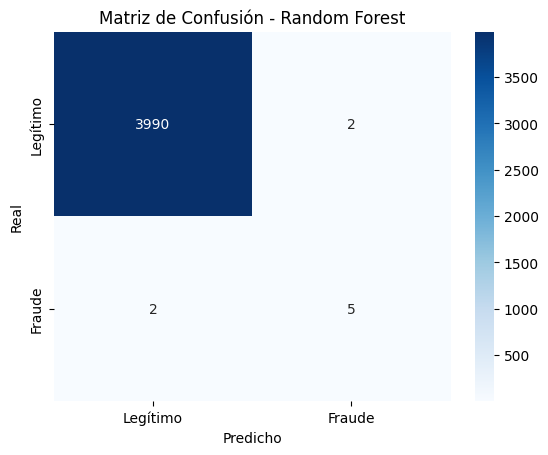

In [7]:
# Entrenamiento del modelo
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(x_train, y_train)

# Ajuste umbral
y_prob_rf = rf_model.predict_proba(x_test)[:, 1]
y_pred_rf = (y_prob_rf > 0.3).astype(int)  

# Rendimiento del modelo
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Legítimo', 'Fraude'], yticklabels=['Legítimo', 'Fraude'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

### Modelo no Supervisado: K-Means Clustering


K-Means Clustering Results:
col_0     0     1
Class            
0      2129  1863
1         3     4
Precisión de K-Means Clustering: 0.5334


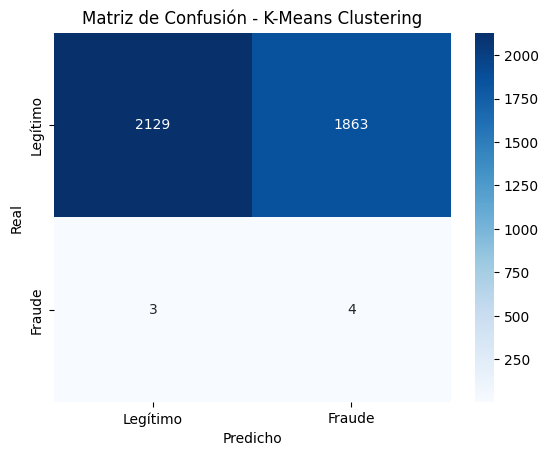

In [8]:
# Escalador de datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Entrenamiento del modelo
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_test_scaled)

# Evaluar modelo
print("\nK-Means Clustering Results:")
print(pd.crosstab(y_test, kmeans_labels))

# Calcular precisión
accuracy_kmeans = accuracy_score(y_test, kmeans_labels)
print(f"Precisión de K-Means Clustering: {accuracy_kmeans:.4f}")

# Matriz de confusión
conf_matrix_kmeans = confusion_matrix(y_test, kmeans_labels)
sns.heatmap(conf_matrix_kmeans, annot=True, fmt='d', cmap='Blues', xticklabels=['Legítimo', 'Fraude'], yticklabels=['Legítimo', 'Fraude'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - K-Means Clustering')
plt.show()



### Red Neuronal con Batch Normalization

c:\Users\Joshua Arango\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
999/999 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5811 - loss: 0.6931 - val_accuracy: 0.3988 - val_loss: 0.7815
Epoch 2/50
999/999 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5650 - loss: 0.6807 - val_accuracy: 0.0060 - val_loss: 0.7985
Epoch 3/50
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4992 - loss: 0.6941 - val_accuracy: 0.9972 - val_loss: 0.6777
Epoch 4/50
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5016 - loss: 0.6925 - val_accuracy: 0.9982 - val_loss: 0.6738
Epoch 5/50
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4960 - loss: 0.6927 - val_accuracy: 0.9972 - val_loss: 0.6883
Epoch 6/50
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5069 - loss: 0.6942 - val_accuracy: 0.9982 - val_loss: 0.6854
Epoch 7/50
999/999 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5019 - loss: 0.6924 - val_accuracy: 0.9982 - val_loss: 0.6852
Epoch 8/50
999/999 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5053 - loss: 0.6920 - val_accuracy: 0

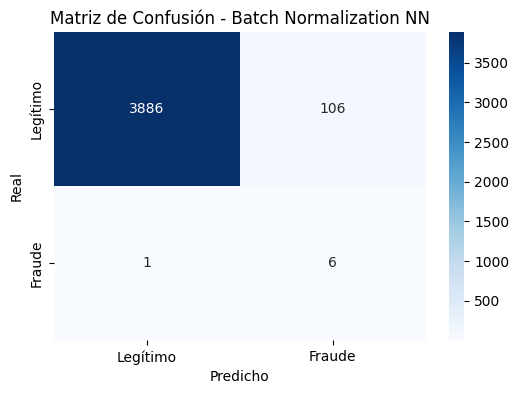

In [9]:
# Establecer semilla
random.seed(42)  
np.random.seed(42)  
tf.random.set_seed(42)  

# Definir EarlyStopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Crear el modelo
bn_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  
    BatchNormalization(),  
    Dropout(0.3),  
    Dense(32, activation='relu'),  
    BatchNormalization(),  
    Dropout(0.3),  
    Dense(16, activation='relu'),  
    Dense(1, activation='sigmoid') 
])

# Compilar el modelo
bn_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con EarlyStopping
history = bn_model.fit(
    x_train, y_train, 
    epochs=50, batch_size=32, 
    validation_data=(x_test, y_test), 
    callbacks=[early_stopping]
)

# Evaluación del modelo
y_prob_bn = bn_model.predict(x_test) 
y_pred_bn = (y_prob_bn > 0.1).astype(int)


# Reporte de métricas
print("Batch Normalization NN Results:")
print(classification_report(y_test, y_pred_bn))

# Matriz de confusión
conf_matrix_nn = confusion_matrix(y_test, y_pred_bn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Legítimo', 'Fraude'], yticklabels=['Legítimo', 'Fraude'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Batch Normalization NN')
plt.show()


### Comparación de Métricas

In [10]:
# Crear tabla
results = {
    "Modelo": ["Random Forest", "Neural Network", "K-Means Clustering"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_bn),
        accuracy_score(y_test, kmeans_labels)  
    ],
    "Precision": [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_bn),
        precision_score(y_test, kmeans_labels) 
    ],
    "Recall": [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_bn),
        recall_score(y_test, kmeans_labels) 
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_bn),
        f1_score(y_test, kmeans_labels) 
    ]
}

# Convertir a DataFrame
df_results = pd.DataFrame(results)

# Imprimir tabla
print(tabulate(df_results, headers="keys", tablefmt="fancy_grid"))


╒════╤════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│    │ Modelo             │   Accuracy │   Precision │   Recall │   F1-Score │
╞════╪════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│  0 │ Random Forest      │   0.999    │  0.714286   │ 0.714286 │ 0.714286   │
├────┼────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  1 │ Neural Network     │   0.973243 │  0.0535714  │ 0.857143 │ 0.10084    │
├────┼────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  2 │ K-Means Clustering │   0.533383 │  0.00214247 │ 0.571429 │ 0.00426894 │
╘════╧════════════════════╧════════════╧═════════════╧══════════╧════════════╛


### Generación del CSV con predicciones

In [11]:
# Crear un diccionario con los resultados de los modelos
resultados = {
    "Verdadero": y_test.tolist(),
    "Predicción_RF": y_pred_rf.tolist(),
    "Probabilidad_RF": y_prob_rf.tolist() if 'y_prob_rf' in locals() else ["N/A"] * len(y_test),
    "Predicción_NN": y_pred_bn.tolist(),
    "Probabilidad_NN": y_prob_bn.tolist() if 'y_prob_bn' in locals() else ["N/A"] * len(y_test),
    "Predicción_KMeans": kmeans_labels.tolist(),
}

df_resultados = pd.DataFrame(resultados)
df_resultados.to_excel("resultados_modelos.xlsx", index=False)
print("✅ Archivo Excel guardado como 'resultados_modelos.xlsx'")


✅ Archivo Excel guardado como 'resultados_modelos.xlsx'


### Análisis de fraudes

In [12]:
# Cargar modelos con sus respectivas matrices de confusión
modelos = {
    "K-Means": conf_matrix_kmeans,     
    "Random Forest": conf_matrix_rf,    
    "Red Neuronal": conf_matrix_nn    
}

# Definir costos
costo_por_investigacion = 18_000  
fraudes_totales = df[df['Class'] == 1].shape[0]  

# Lista para almacenar los resultados
resultados_modelos = []

# Recorrer cada modelo 
for nombre_modelo, matriz in modelos.items():
    tn, fp, fn, tp = matriz.ravel()  # Verdaderos Negativos, Falsos Positivos, Falsos Negativos, Verdaderos Positivos

    # Calcular la cantidad real de fraudes
    tp_total = int((tp / (tp + fn)) * fraudes_totales)
    fn_total = fraudes_totales - tp_total 

    # Calcular el ahorro
    ahorro_por_fraudes_detectados = tp_total * costo_por_investigacion  

    # Guardar resultados en la lista
    resultados_modelos.append({
        "Modelo": nombre_modelo,  
        "TP (Fraudes Detectados)": tp_total,  
        "FN (Fraudes No Detectados)": fn_total, 
        "Ahorro por Fraudes Detectados (COP)": f"${ahorro_por_fraudes_detectados:,.0f}"
    })

# Convertir lista de en DataFrame
df_resultados = pd.DataFrame(resultados_modelos)

# Imprimir los resultados
print("Comparación de Modelos\n")
print(df_resultados.to_string(index=False)) 


Comparación de Modelos

       Modelo  TP (Fraudes Detectados)  FN (Fraudes No Detectados) Ahorro por Fraudes Detectados (COP)
      K-Means                       19                          15                            $342,000
Random Forest                       24                          10                            $432,000
 Red Neuronal                       29                           5                            $522,000


In [13]:
# Convertir y_prob_bn en un DataFrame
df_resultados = pd.DataFrame({"Probabilidad_NN": y_prob_bn.flatten()})

# Obtener valores únicos y calcular percentiles
valores_unicos = np.unique(df_resultados["Probabilidad_NN"])
percentil_33, percentil_66 = np.percentile(valores_unicos, [33, 66])

# Clasificación según los percentiles
df_resultados["Nivel de Riesgo"] = pd.cut(
    df_resultados["Probabilidad_NN"],
    bins=[-np.inf, percentil_33, percentil_66, np.inf],
    labels=["Bajo", "Medio", "Alto"]
)

# Imprimir resultados
print(f"Percentil 33: {percentil_33}, Percentil 66: {percentil_66}")
print(df_resultados["Nivel de Riesgo"].value_counts())


Percentil 33: 0.016920878458768128, Percentil 66: 0.0397102490067482
Nivel de Riesgo
Bajo     3660
Alto      172
Medio     167
Name: count, dtype: int64
